In [2]:
!curl 'http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/EnglishImg.tgz' -o data.tgz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  127M  100  127M    0     0  88.9M      0  0:00:01  0:00:01 --:--:-- 88.9M


In [3]:
!tar xf data.tgz

In [4]:
!ls

data.tgz  English  sample_data


In [5]:
!ls English

Img


In [6]:
!ls English/Img

BadImag  GoodImg


In [9]:
!ls English/Img/GoodImg

Bmp  Msk


In [11]:
!ls English/Img/GoodImg/Bmp

Sample001  Sample010  Sample019  Sample028  Sample037  Sample046  Sample055
Sample002  Sample011  Sample020  Sample029  Sample038  Sample047  Sample056
Sample003  Sample012  Sample021  Sample030  Sample039  Sample048  Sample057
Sample004  Sample013  Sample022  Sample031  Sample040  Sample049  Sample058
Sample005  Sample014  Sample023  Sample032  Sample041  Sample050  Sample059
Sample006  Sample015  Sample024  Sample033  Sample042  Sample051  Sample060
Sample007  Sample016  Sample025  Sample034  Sample043  Sample052  Sample061
Sample008  Sample017  Sample026  Sample035  Sample044  Sample053  Sample062
Sample009  Sample018  Sample027  Sample036  Sample045  Sample054


In [59]:
!ls /content/English/Img/GoodImg/Bmp/*

/content/English/Img/GoodImg/Bmp/Sample001:
img001-00001.png  img001-00028.png  img001-00055.png  img001-00082.png
img001-00002.png  img001-00029.png  img001-00056.png  img001-00083.png
img001-00003.png  img001-00030.png  img001-00057.png  img001-00084.png
img001-00004.png  img001-00031.png  img001-00058.png  img001-00085.png
img001-00005.png  img001-00032.png  img001-00059.png  img001-00086.png
img001-00006.png  img001-00033.png  img001-00060.png  img001-00087.png
img001-00007.png  img001-00034.png  img001-00061.png  img001-00088.png
img001-00008.png  img001-00035.png  img001-00062.png  img001-00089.png
img001-00009.png  img001-00036.png  img001-00063.png  img001-00090.png
img001-00010.png  img001-00037.png  img001-00064.png  img001-00091.png
img001-00011.png  img001-00038.png  img001-00065.png  img001-00092.png
img001-00012.png  img001-00039.png  img001-00066.png  img001-00093.png
img001-00013.png  img001-00040.png  img001-00067.png  img001-00094.png
img001-00014.png  img001-00041.pn

In [18]:
import matplotlib.pyplot as plt
import os

In [98]:
os.chdir('/content/English/Img/GoodImg/Bmp')

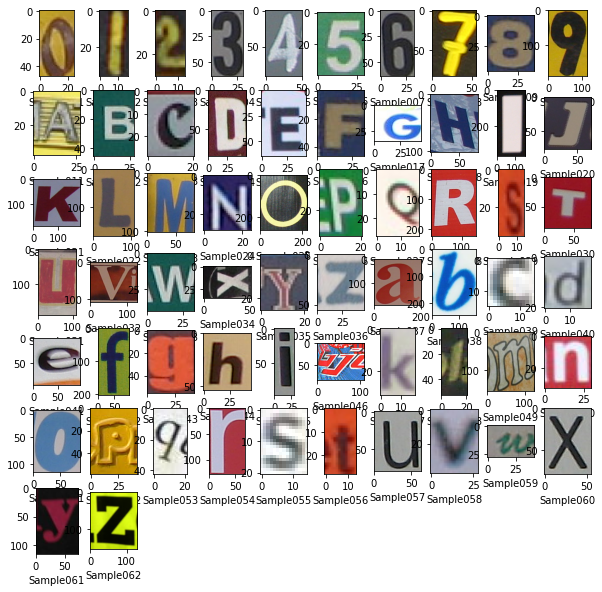

In [99]:
import matplotlib.image as img

plt.figure(figsize=(10,10))
i = 0
for dir in sorted(os.listdir()):
  i += 1
  
  plt.subplot(7,10,i)
  # print first image
  plt.imshow(img.imread(dir + '/' + os.listdir(dir)[0]))
  plt.xlabel(dir)

# Задача бінарної класифікації
Віддилимо цифри від літер.

In [100]:
!pwd

/content/English/Img/GoodImg/Bmp


In [ ]:
!mkdir Numbers

In [108]:
!mv Sample001/* Sample002/* Sample003/* Sample004/* Sample005/* Sample006/* Sample007/* Sample008/* Sample009/* Numbers/

In [112]:
!mkdir Letters

In [113]:
!mv Sample*/* Letters

In [115]:
!rm -r Sample*

In [162]:
import tensorflow as tf
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/English/Img/GoodImg/Bmp',
    seed=123,
    subset='training',
    validation_split=0.2,
    label_mode='binary',
    image_size=(128,128),
    color_mode='grayscale')

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/English/Img/GoodImg/Bmp',
    seed=123,
    subset='validation',
    validation_split=0.2,
    label_mode='binary',
    image_size=(128,128),
    color_mode='grayscale')

Found 7705 files belonging to 2 classes.
Using 6164 files for training.
Found 7705 files belonging to 2 classes.
Using 1541 files for validation.


In [276]:
class_names = dataset.class_names
for images, labels in train_dataset.take(1):
  print(images.shape)
  print(images[0])
  print(labels)
  print(labels.shape)
  print([class_names[int(l)] for l in labels])
dataset.map(print)

(32, 128, 128, 1)
tf.Tensor(
[[[203.     ]
  [203.     ]
  [203.     ]
  ...
  [216.     ]
  [216.     ]
  [216.     ]]

 [[203.     ]
  [203.     ]
  [203.     ]
  ...
  [216.     ]
  [216.     ]
  [216.     ]]

 [[203.02344]
  [203.02344]
  [203.02344]
  ...
  [215.99219]
  [215.99219]
  [215.99219]]

 ...

 [[209.00781]
  [209.00781]
  [209.00781]
  ...
  [188.05469]
  [188.05469]
  [188.05469]]

 [[209.     ]
  [209.     ]
  [209.     ]
  ...
  [188.     ]
  [188.     ]
  [188.     ]]

 [[209.     ]
  [209.     ]
  [209.     ]
  ...
  [188.     ]
  [188.     ]
  [188.     ]]], shape=(128, 128, 1), dtype=float32)
tf.Tensor(
[[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(32, 1), dtype=float32)
(32, 1)
['Numbers', 'Letters', 'Numbers', 'Letters', 'Letters', 'Letters', 'Letters', 'Numbers', 'Letters', 'Letters', 'Letters', 'Numbers', 

<MapDataset shapes: <unknown>, types: tf.int32>

In [223]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(128,128,1)))
model.add(Dense(100, activation="relu"))
model.add(Dense(300, activation="relu"))
model.add(Dense(200, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(1, activation="softmax"))

model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

model.fit(train_dataset, epochs=5, verbose=1, validation_data=val_dataset, batch_size=5)

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 16384)             0         
                                                                 
 dense_163 (Dense)           (None, 100)               1638500   
                                                                 
 dense_164 (Dense)           (None, 300)               30300     
                                                                 
 dense_165 (Dense)           (None, 200)               60200     
                                                                 
 dense_166 (Dense)           (None, 100)               20100     
                                                                 
 dense_167 (Dense)           (None, 1)                 101       
                                                                 
Total params: 1,749,201
Trainable params: 1,749,201
N

# Перевіримо

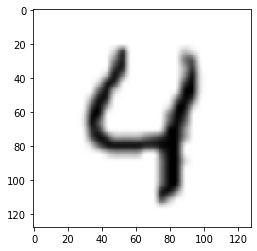

In [224]:

from tensorflow.keras.preprocessing import image
digit4 = image.load_img('/content/digit-4.png', target_size=(128,128), color_mode = "grayscale")
plt.imshow(digit4.convert('RGBA'))
plt.show()

In [226]:
x = image.img_to_array(digit4)

In [270]:
x = x.reshape((128, 128, 1))
print(x.shape)

(128, 128, 1)


In [274]:
import numpy as np
print(model.predict(np.array([x])))

[[nan]]


Мережа повертає NaN, це трохи дивно.

Також підозріле значення 0.9195, яке не змінювалося з кожною новою епохою.

Перевіримо співвідношення букв (клас 0) до цифр (клас 1) у val_dataset:

In [291]:
ones = 0
total = 0
for _, labels in val_dataset:
  ones += np.sum(labels)
  total += np.size(labels)
print(ones, total)

124.0 1541


In [289]:
1 - (124 / 1541)

0.9195327709279688

Хмм, 91.95% елементів є буквами, тобто мають значення 0. Це співпадає зі значенням `val_accuracy`. Отже, наша мережа "деградувала" - постійно видає значення NaN - і це надає "точність" 0.9195.

Спростимо задачу: замість категоризації букв/цифр будемо категоризувати нулі та одиниці. Тоді матимемо співвідношення приблизно 50/50.

In [292]:
!ls

Letters  Numbers


In [293]:
!rm -r Letters

In [295]:
!mkdir ones
!mkdir zeroes

In [297]:
!mv Numbers/img001* zeroes

In [298]:
!mv Numbers/img002* ones

In [300]:
!rm -r Numbers

In [317]:
!ls ones zeroes

ones:
img002-00001.png  img002-00021.png  img002-00041.png  img002-00061.png
img002-00002.png  img002-00022.png  img002-00042.png  img002-00062.png
img002-00003.png  img002-00023.png  img002-00043.png  img002-00063.png
img002-00004.png  img002-00024.png  img002-00044.png  img002-00064.png
img002-00005.png  img002-00025.png  img002-00045.png  img002-00065.png
img002-00006.png  img002-00026.png  img002-00046.png  img002-00066.png
img002-00007.png  img002-00027.png  img002-00047.png  img002-00067.png
img002-00008.png  img002-00028.png  img002-00048.png  img002-00068.png
img002-00009.png  img002-00029.png  img002-00049.png  img002-00069.png
img002-00010.png  img002-00030.png  img002-00050.png  img002-00070.png
img002-00011.png  img002-00031.png  img002-00051.png  img002-00071.png
img002-00012.png  img002-00032.png  img002-00052.png  img002-00072.png
img002-00013.png  img002-00033.png  img002-00053.png  img002-00073.png
img002-00014.png  img002-00034.png  img002-00054.png  img002-00074.png


In [426]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/English/Img/GoodImg/Bmp',
    seed=123,
    subset='training',
    validation_split=0.2,
    label_mode='binary',
    image_size=(32,32),
    color_mode='grayscale')

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/English/Img/GoodImg/Bmp',
    seed=123,
    subset='validation',
    validation_split=0.2,
    label_mode='binary',
    image_size=(32,32),
    color_mode='grayscale')

Found 184 files belonging to 2 classes.
Using 148 files for training.
Found 184 files belonging to 2 classes.
Using 36 files for validation.


**Також спробуємо використати CNN замість звичайної нейронної мережі.**

In [428]:
from keras.layers import Conv2D, Rescaling

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(32,32,1)),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())

model.fit(train_dataset, epochs=50, verbose=1, validation_data=val_dataset)

Model: "sequential_93"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_24 (Rescaling)    (None, 32, 32, 1)         0         
                                                                 
 conv2d_111 (Conv2D)         (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_112 (Conv2D)         (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 6, 6, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_113 (Conv2D)         (None, 4, 4, 32)        

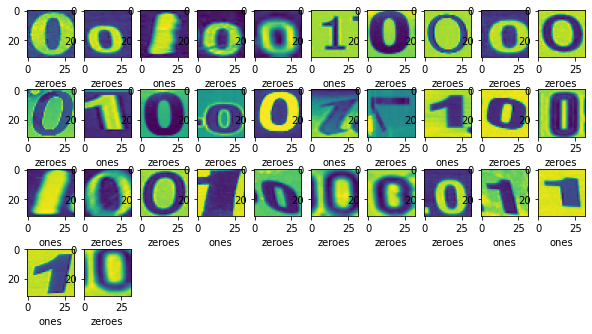

In [455]:
plt.figure(figsize=(10,10))
i = 0
for images, _ in val_dataset.take(1):
  for image in images:
    x = np.reshape(image, (1,32,32))
  
    i += 1
    plt.subplot(7,10,i)
    plt.imshow(np.reshape(x, (32,32)))
    
    y = model.predict(x)[0][0]
    plt.xlabel(class_names[round(y)])
plt.show()

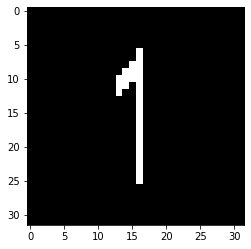

In [457]:
from tensorflow.keras.preprocessing import image
digit1 = image.load_img('/content/digit-1.jpg', target_size=(32,32), color_mode = "grayscale")
plt.imshow(digit1.convert('RGBA'))
plt.show()

In [460]:
x = image.img_to_array(digit1)
x = x.reshape((1, 32, 32))

y = model.predict(x)[0][0]
print(val_dataset.class_names[round(y)])

ones
